<a href="https://colab.research.google.com/github/adi0229/ML-DL/blob/master/spotify_2010_2019_top.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 连接 google drive 网络硬盘

from google.colab import drive
drive.mount('/content/gdrive')    

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


数据集来源：[Kaggle-top-spotify-songs-from-20102019-by-year](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)

### 捉虫Debug：utf-8无法解码

Kaggle 上下载的原始 CSV 文件，在读取时，Pandas 报错了“'utf-8' codec 

In [0]:
import pandas as pd

DATASET_DIR = '/content/gdrive/My Drive/data/'
top_10s = pd.read_csv(DATASET_DIR + "spotify_top_2010_2019.csv",index_col=0)

UnicodeDecodeError: ignored

解法：

笔者在 stackoverflow上寻求解决办法，在网页“https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c ”中的高赞回答得知，在 Pandas读取 CSV 文件时，添加参数 engine='python'即可

`pd.read_csv(gdp_path, sep='\t', engine='python')`

In [0]:
import pandas as pd

DATASET_DIR = '/content/gdrive/My Drive/data/'
top_10s = pd.read_csv(DATASET_DIR + "spotify_top_2010_2019.csv", 
                      engine='python',index_col=0)

## 数据表概览

In [0]:
top_10s.shape

(603, 14)

In [0]:
top_10s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
title        603 non-null object
artist       603 non-null object
top genre    603 non-null object
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


数据列（columns）说明:

- title：歌名
- artist：艺术家
- top genre: 音轨（歌曲）的类型
- year：Billboard打榜年份
- bpm：每分钟的节拍，歌曲的速度。
- nrgy：歌曲的能量，数值越高，越有活力。
- dnce：“可跳舞指数”，数值越高，越容易随歌而舞。
- dB：数值越高，音量越高
- live：现场指数，数值越高，这首歌越可能是一个现场录音。
- dur：歌曲时长
- acous：原声指数，数值越高，歌曲的原声（“由真实乐器天然产生的”）元素越多
- spch：口语指数，数值越高，歌曲的口语元素越多 
- pop：流行指数，数值越高，歌曲的越流行。

In [0]:
top_10s.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## EDA数据探索问题：

上次，笔者简单地分析了 [2019 年 Spotify 最热歌曲](https://adi0229.github.io/2020/01/02/2020-01-02-pandas-top25-tricks/)。
这一次，笔者收集到的是 Spotify 的 2010-2019 年的最热流行歌曲。

问题来了：

既然 2019 年的 top 歌曲里头，歌曲类型（genre）是 dance pop 的歌曲频率最高。

那么，过去十年，是否也是 dance pop 的歌曲类型在 Spotify 最流行呢？
而且，随着年份的变迁，流行的歌曲类型，是否也有所变化?


In [0]:
top10_genres = top_10s['top genre'].value_counts()[:10]
top10_genres

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
Name: top genre, dtype: int64

通过查看其它年份的数据，交叉验证得知，Spotify音乐平台里，dance pop就是惹人爱的，过去 10 年，327首打榜热歌，都是dance pop，第二多的类型是常规流行歌曲 pop。

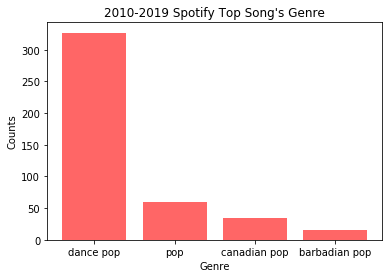

In [0]:
import matplotlib.pyplot as plt

plt.bar(top10_genres[:4].index, top10_genres[:4], color = 'red',
        alpha=0.6, align = 'center') 
plt.title("2010-2019 Spotify Top Song's Genre") 
plt.ylabel('Counts') 
plt.xlabel('Genre') 
plt.show()

继续提问：

每一年的热门歌曲的风格，哪一种最多呢？


Year: 2010


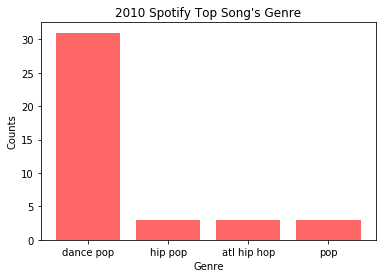

Year: 2011


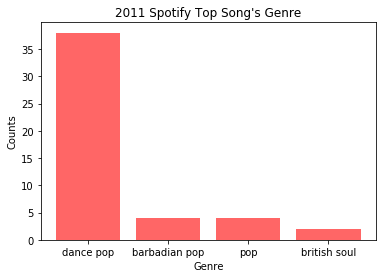

Year: 2012


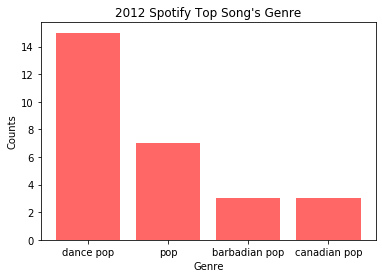

Year: 2013


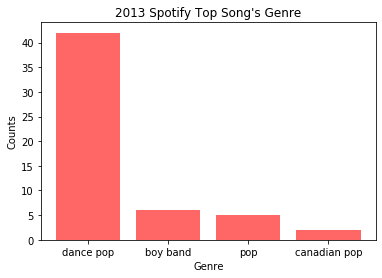

Year: 2014


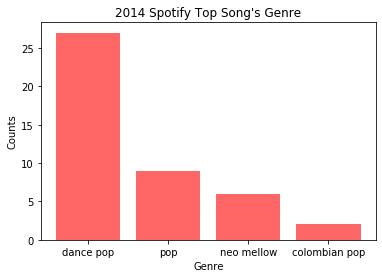

Year: 2015


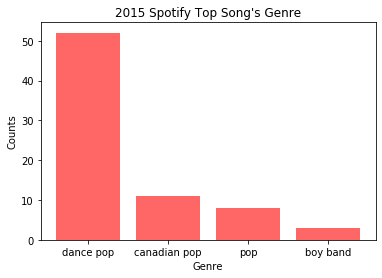

Year: 2016


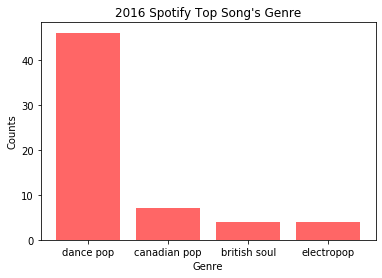

Year: 2017


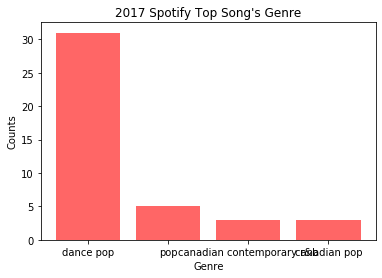

Year: 2018


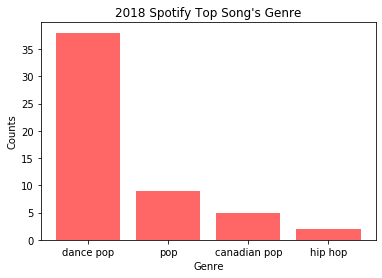

Year: 2019


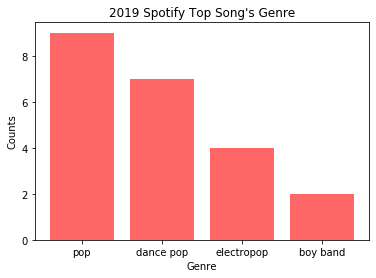

In [0]:
for year in top_10s.year.unique():
  print('Year:', year)
  single_year_top = top_10s[top_10s.year == year]
  top_genres = single_year_top['top genre'].value_counts()[:10]
  plt.bar(top_genres[:4].index, top_genres[:4], color = 'red',
        alpha=0.6, align = 'center') 
  plt.title(f"{year} Spotify Top Song's Genre") 
  plt.ylabel('Counts') 
  plt.xlabel('Genre') 
  plt.show() 

笔者喜欢听现场音乐，有时候，对音质略显粗糙的现场录音也情有独钟。

继续提问：

这些热门歌曲，其中的现场录音的“感觉”多吗？


In [0]:
top_10s.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [0]:
top_10s['live'].describe()

count    603.000000
mean      17.774461
std       13.102543
min        0.000000
25%        9.000000
50%       12.000000
75%       24.000000
max       74.000000
Name: live, dtype: float64

In [0]:
top_10s.pivot_table(values='live',index='year',aggfunc='mean')

,live
year,
2010,21.176471
2011,20.943396
2012,15.828571
2013,19.718310
2014,17.293103
2015,18.305263
2016,17.737500
2017,15.369231
2018,14.750000


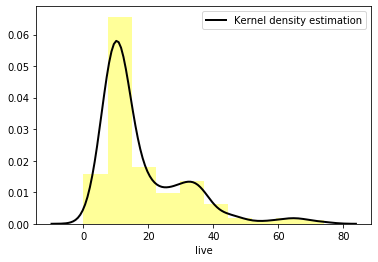

In [0]:
import seaborn as sns

sns.distplot(top_10s['live'],bins=10,kde=True,
             kde_kws={"color": "k", "lw": 2, 
                      "label": "Kernel density estimation"},color='yellow')
plt.show()

背景知识：

核密度估计（kernel density estimation）

>所谓核密度估计，就是采用平滑的峰值函数(“核”)来拟合观察到的数据点，从而对真实的概率分布曲线进行模拟。

>核密度函数就是一种“平滑(smooth)”的手段。相当于是“我说我很牛逼你可能不信，但你可以听听我的朋友们是怎么评价我的，加权平均下就能更好地了解我了”。

Ref：[核密度估计（kernel density estimation）](https://lotabout.me/2018/kernel-density-estimation/) [一维数据可视化：核密度估计(Kernel Density Estimates)](http://blog.shaochuancs.com/statistics-kde/)

但是，直方图和核密度函数估计的是某个数据值的概率分布，我们想看看数据的累计分布,回答这些问题：

- 某年在总统选举，投票某位候选人A的比例超过一半的州，在所有选举州里面，占比是多少？

这里，我试着提出一个问题：

- live 属性方面，live超过平均值的歌曲，所占的比例多大？

这时候，累积分布函数（Cumulative Distribution Function，简写CDF）就派上用场了。


Ref：


[Chuan's blog:一维数据可视化：累积分布函数](http://blog.shaochuancs.com/statistics-cdf/)

(-4.111111111111111, 78.11111111111111)

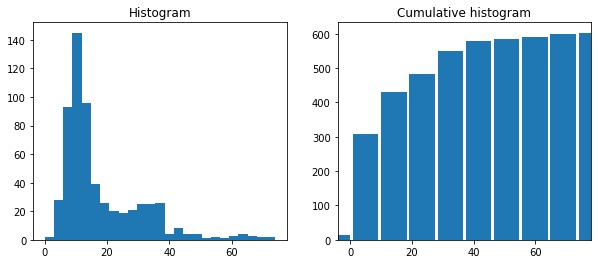

In [0]:
# Python画图累积分布函数

# from scipy import stats
# import numpy as np

# res = stats.cumfreq(top_10s['live'])

# x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,
#                                  res.cumcount.size)

# fig = plt.figure(figsize=(10, 4))
# ax1 = fig.add_subplot(1, 2, 1)
# ax2 = fig.add_subplot(1, 2, 2)
# ax1.hist(top_10s['live'], bins=25)
# ax1.set_title('Histogram')
# ax2.bar(x, res.cumcount, width=res.binsize)
# ax2.set_title('Cumulative histogram')
# ax2.set_xlim([x.min(), x.max()])

问题又来了：

在DataCamp的ython统计思维课程上的学到的概念， ECDF(Empirical Cumulative Distribution Function)，它与 CDF 有何区别？

[empirical-cdf-vs-cdf](https://stats.stackexchange.com/questions/239937/empirical-cdf-vs-cdf)这篇帖子介绍了两者的区别：

ECDF经验性累积分布函数是从样本中推断的整体的累计分布函数，因为它是经验性的从观察实例得出，而不是纯理论思辨得出的，所以叫“Empirical”。

# 蜜蜂群图（bee swam plot）

2010-2014年 VS 2015-2019年


In [0]:
list(range(2010,2015))

[2010, 2011, 2012, 2013, 2014]

In [0]:
# 只查看2010年-2015年的歌曲

top_10_14 = top_10s[top_10s.year.isin(list(range(2010,2015)))]
top_15_19 = top_10s[~top_10s.year.isin(list(range(2010,2015)))]
top_15_19.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
269,Thinking out Loud,Ed Sheeran,pop,2015,79,45,78,-6,18,59,282,47,3,84
270,I'm Not The Only One,Sam Smith,pop,2015,82,49,68,-6,8,49,239,53,4,84
271,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,84
272,Love Yourself,Justin Bieber,canadian pop,2015,100,38,61,-10,28,52,234,84,44,83
273,Uptown Funk,Mark Ronson,dance pop,2015,115,61,86,-7,3,93,270,1,8,82


In [0]:
print(top_10_14.live.describe())
print("-"*30)
print(top_15_19.live.describe())

count    268.000000
mean      19.205224
std       13.721646
min        3.000000
25%       10.000000
50%       13.000000
75%       28.000000
max       70.000000
Name: live, dtype: float64
------------------------------
count    335.000000
mean      16.629851
std       12.488330
min        0.000000
25%        9.000000
50%       12.000000
75%       20.000000
max       74.000000
Name: live, dtype: float64


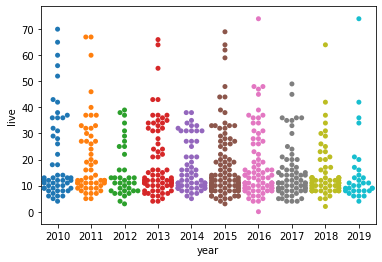

In [0]:
# 蜂群图：展示所有数据点&查看不同的类别变量（本例的年份）之下的数据分布

_ = sns.swarmplot(x='year',y='live',data=top_10s)

_ = plt.xlabel('year')
_ = plt.ylabel('live')

plt.show()

In [0]:
def ecdf(data):

    """计算一维数列的经验性累积函数的数值"""
    # 数据的数量
    n = len(data)
    # 排序之后的数列
    x = np.sort(data)
    # ECDF函数Y轴
    y = np.arange(1, n+1) / n

    return x, y

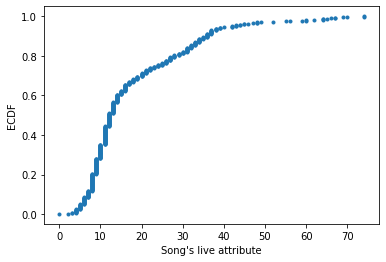

In [0]:
x_live, y_live = ecdf(top_10s['live'])

plt.plot(x_live, y_live,marker='.',linestyle='none')
plt.xlabel("Song's live attribute")
plt.ylabel('ECDF')

plt.show()

从 ECDF 图看出，近 7 成的歌曲live 属性不足20。

最后听听歌吧，10 年来，Spotify 最热歌曲里头，现场录音的歌曲都有哪些？

In [0]:
top_10s.sort_values(by='live',ascending=False).head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
401,NO,Meghan Trainor,dance pop,2016,92,80,56,-4,74,65,214,1,22,70
582,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90
13,Cooler Than Me - Single Mix,Mike Posner,dance pop,2010,130,82,77,-5,70,63,213,18,5,73
355,Time of Our Lives,Pitbull,dance pop,2015,124,80,72,-6,69,72,229,9,6,45
64,Monster,Kanye West,chicago rap,2011,125,69,63,-6,67,10,379,0,20,73


![](https://upload-images.jianshu.io/upload_images/452087-1fed87864606caa9.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
![](https://upload-images.jianshu.io/upload_images/452087-2f6c71026bed15a7.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


# changelog 

2020/1/8 1:08 PM init 1h

2020/1/8 4:12 PM 添加 live 属性的数据分析